First 5 rows of the dataset:
   age         job  marital  education  balance housing loan  contact  day  \
0   59      admin.  married  secondary     2343     yes   no  unknown    5   
1   56      admin.  married  secondary       45      no   no  unknown    5   
2   41  technician  married  secondary     1270     yes   no  unknown    5   
3   55    services  married  secondary     2476     yes   no  unknown    5   
4   54      admin.  married   tertiary      184      no   no  unknown    5   

  month  duration  campaign  pdays  previous deposit  
0   may      1042         1     -1         0     yes  
1   may      1467         1     -1         0     yes  
2   may      1389         1     -1         0     yes  
3   may       579         1     -1         0     yes  
4   may       673         2     -1         0     yes  

Dataset Shape: (11162, 15)
Column Names: ['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', '

/tmp/ipykernel_37853/2929417842.py:30: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
/tmp/ipykernel_37853/2929417842.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='deposit', data=df, palette='Set2')


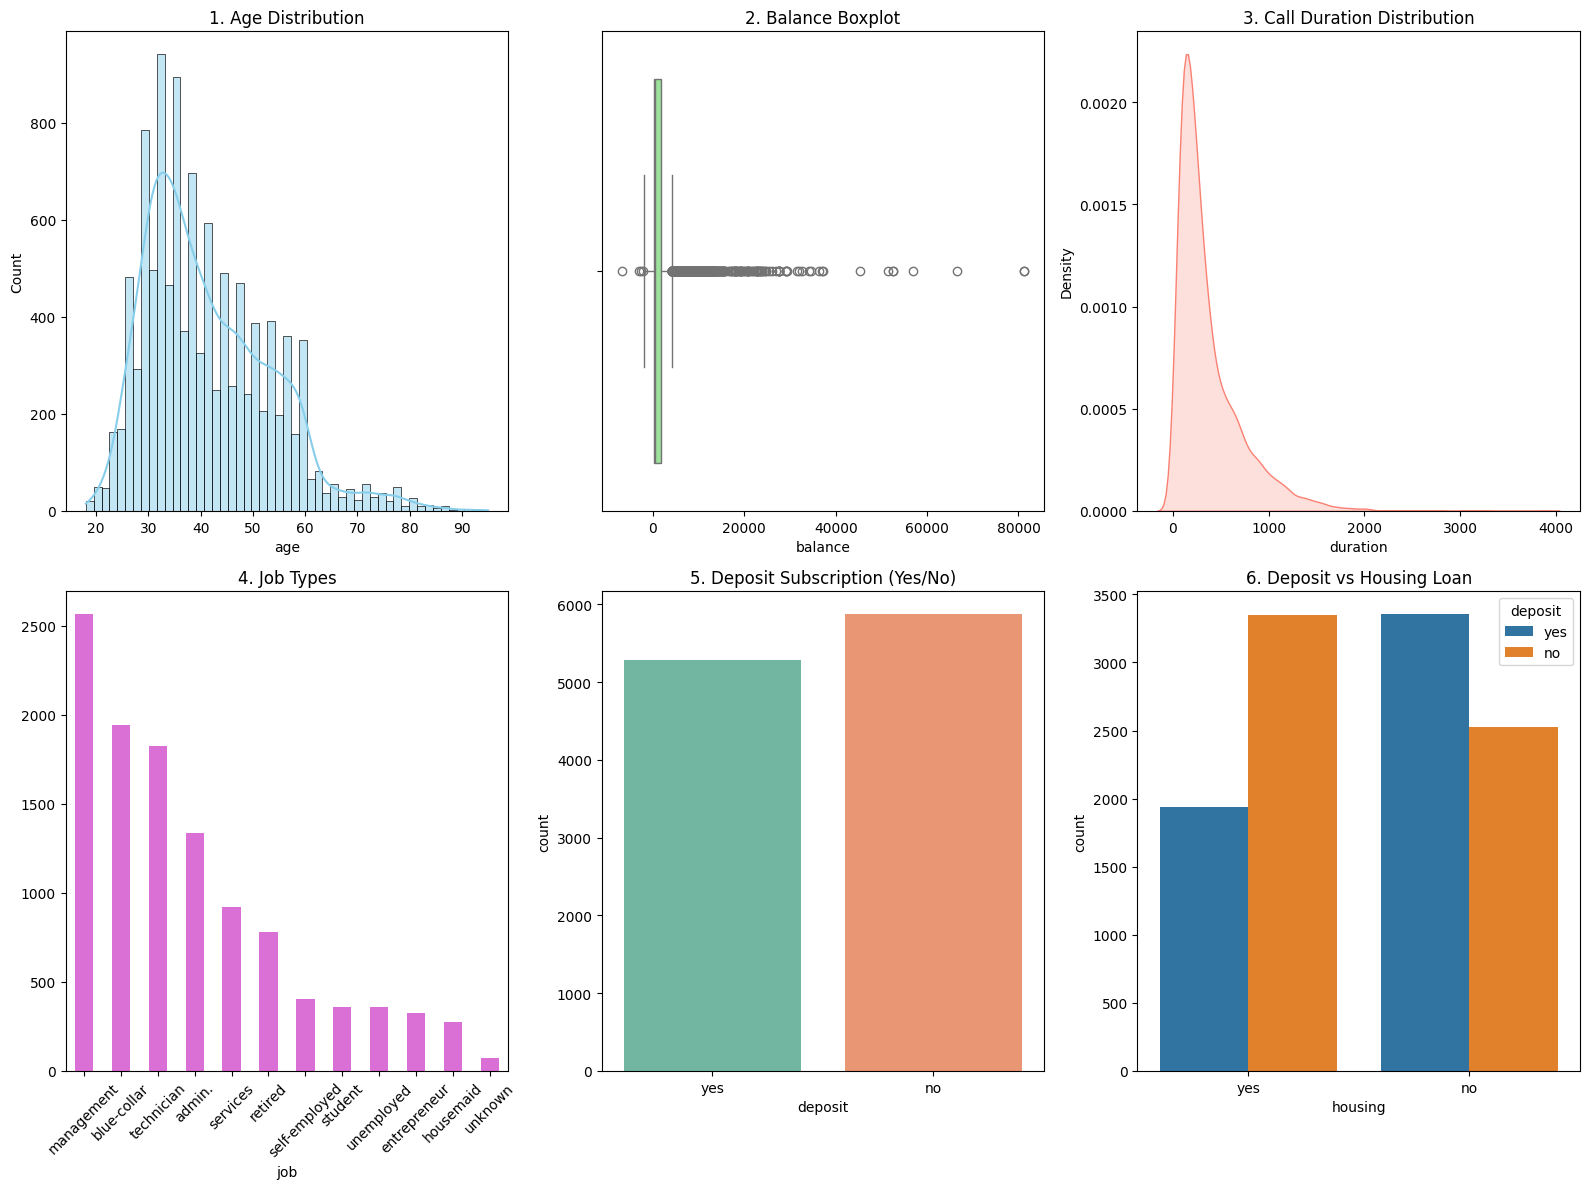

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# PART 1: Data Understanding
# ==========================================

# Load the dataset
df = pd.read_csv('bank - bank.csv')

# Display basic information
print("First 5 rows of the dataset:")
print(df.head())

print(f"\nDataset Shape: {df.shape}")
print(f"Column Names: {df.columns.tolist()}")

# Check data types and non-null counts
print("\nDataset Info:")
print(df.info())

# ==========================================
# PART 2: Data Type Checking & Handling
# ==========================================

# Separate columns into Numerical and Categorical
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical Columns: {numerical_cols}")
print(f"Categorical Columns: {categorical_cols}")

# Observation: Based on info(), all types match their content (No conversion needed)

# ==========================================
# PART 3: Missing Values Analysis
# ==========================================

# Check for missing values
null_counts = df.isnull().sum()

# Calculate percentage of missing values
null_percentage = (null_counts / len(df)) * 100

# Create a summary table for missing values
missing_data_summary = pd.DataFrame({
    'Column Name': df.columns,
    'Number of Nulls': null_counts,
    'Percentage of Nulls (%)': null_percentage
})
print("\nMissing Values Summary:")
print(missing_data_summary)

# ==========================================
# PART 4: Handling Missing Values
# ==========================================

# --- Method 1: Drop Columns (Threshold > 40%) ---
# Explanation: Dropping columns is risky because it might remove essential features 
# that have high predictive power, leading to information loss.
df_method1 = df.loc[:, df.isnull().mean() < 0.4]

# --- Method 2: Drop Rows ---
# Compare dataset size before and after
print(f"\nRows before dropping: {len(df)}")
df_method2 = df.dropna()
print(f"Rows after dropping nulls: {len(df_method2)}")

# --- Method 3: Imputation (Best Practice) ---
# Numerical: Fill with Median (Robust to outliers)
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical: Fill with Mode (Most frequent value)
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# ==========================================
# PART 5: Basic Data Visualization
# ==========================================


plt.figure(figsize=(16, 12))

# 1. Histogram of age (Numerical)
plt.subplot(2, 3, 1)
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title('1. Age Distribution')
# Interpretation: Shows the age range of customers, mostly between 30 and 50.

# 2. Boxplot of balance (Numerical)
plt.subplot(2, 3, 2)
sns.boxplot(x=df['balance'], color='lightgreen')
plt.title('2. Balance Boxplot')
# Interpretation: Identifies outliers in customer balances.

# 3. Distribution of duration (Numerical)
plt.subplot(2, 3, 3)
sns.kdeplot(df['duration'], fill=True, color='salmon')
plt.title('3. Call Duration Distribution')
# Interpretation: Most calls are short, with a few very long conversations.

# 4. Bar chart of job (Categorical)
plt.subplot(2, 3, 4)
df['job'].value_counts().plot(kind='bar', color='orchid')
plt.title('4. Job Types')
plt.xticks(rotation=45)
# Interpretation: Management and Blue-collar are the most frequent jobs.

# 5. Bar chart of deposit (Target)
plt.subplot(2, 3, 5)
sns.countplot(x='deposit', data=df, palette='Set2')
plt.title('5. Deposit Subscription (Yes/No)')
# Interpretation: Shows the balance between successful and failed conversions.

# 6. Count plot of deposit vs housing (Relationship)
plt.subplot(2, 3, 6)
sns.countplot(x='housing', hue='deposit', data=df)
plt.title('6. Deposit vs Housing Loan')
# Interpretation: Analyzes if having a house loan affects deposit subscription.

plt.tight_layout()
plt.show()